In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.linear_model 
from datetime import datetime
from time import time
from datetime import timedelta

In [25]:
#read in the results data from the site
df = pd.read_csv("/Users/wgm20/PycharmProjects/ArdRockResults/2018/ArdRockEnduroResults2018.csv", index_col=0)
df = df[df.Time != 'DNF']
df[:10]

,No.,Name,Team,Class,Time,Behind,Hardtail,S1: Fox Racing,S1: Fox Racing Position,S2: Camelbak,...,S3: Maxxis,S3: Maxxis Position,S4: Hope,S4: Hope Position,S5: Peatys,S5: Peatys Position,S6: Exposure,S6: Exposure Position,S7: Julbo,S7: Julbo Position
Pos,,,,,,,,,,,,,,,,,,,,,
1st,2,Steve Peat,Santa Cruz Syndicate,Enduro | Veteran Male,00:19:25.8,,,00:04:10.0,10th,00:02:51.1,...,00:02:52.0,3rd,00:02:54.5,1st,00:02:15.0,4th,00:02:25.3,3rd,00:01:57.8,1st
2nd,80,Danny Hart,Madison Saracen Factory Racing,Enduro | Senior Male,00:19:29.8,+0:04.02,,00:04:00.5,1st,00:02:53.2,...,00:02:49.5,1st,00:02:59.0,6th,00:02:17.1,14th,00:02:25.8,4th,00:02:04.8,3rd
3rd,15,Emyr Davies,Ride.io / Orange Factory Racing,Enduro | Senior Male,00:19:36.9,+0:11.12,,00:04:00.7,2nd,00:02:52.0,...,00:02:56.7,12th,00:02:55.9,2nd,00:02:16.7,8th,00:02:27.9,10th,00:02:07.1,9th
4th,3,Ian Austermuhle,Hope Factory Racing,Enduro | Master Male,00:19:43.4,+0:17.65,,00:04:05.9,8th,00:02:53.7,...,00:02:54.5,6th,00:02:57.2,3rd,00:02:20.6,35th,00:02:27.5,8th,00:02:04.1,2nd
5th,11,Sam Flockhart,Intense Racing UK,Enduro | Senior Male,00:19:43.8,+0:18.03,,00:04:01.5,3rd,00:02:53.7,...,00:02:50.6,2nd,00:03:13.8,68th=,00:02:16.8,12th,00:02:22.0,1st,00:02:05.4,5th
6th,1192,Sam Shucksmilt,Whyte Bikes,Enduro | Senior Male,00:19:50.3,+0:24.52,,00:04:05.5,6th,00:03:11.9,...,00:02:52.3,4th,00:02:57.5,4th,00:02:14.6,3rd,00:02:23.5,2nd,00:02:05.0,4th
7th,6,Liam Moynihan,The Dudes of Hazzard,Enduro | Senior Male,00:19:51.1,+0:25.34,,00:04:03.0,4th,00:03:00.3,...,00:02:55.4,8th,00:02:59.5,9th,00:02:17.5,18th,00:02:28.4,11th,00:02:07.0,7th=
8th,1161,Cai Grocott,Orbea BiCycles,Enduro | Senior Male,00:20:02.0,+0:36.20,,00:04:05.5,7th,00:02:58.0,...,00:02:57.1,14th,00:03:01.7,13th,00:02:23.6,62nd,00:02:29.8,17th,00:02:06.2,6th
9th,1177,James Shirley,Identiti Bikes,Enduro | Senior Male,00:20:06.9,+0:41.09,,00:04:15.8,19th,00:03:04.8,...,00:02:55.9,9th,00:02:57.9,5th,00:02:16.7,10th,00:02:27.1,7th,00:02:08.6,12th


In [6]:
#convert time column from strings to datetime and calculate time/stageWinners time by stage
tZero = datetime.strptime("0:0.0", "%M:%S.%f")
def stringTimeToSeconds(x):
    t = datetime.strptime(x, "%H:%M:%S.%f") - tZero
    return t.microseconds/1e6 + t.seconds 

categories = pd.Series.unique(df.Class)

def normalizedTimeFromColName(colName):
    raceTime = df[colName].apply(stringTimeToSeconds)
    winner = raceTime.min()
    normRaceTime = (raceTime/winner)
    return normRaceTime

def addNormTimeToDf(df,colName):
    normtime = normalizedTimeFromColName(colName)
    name = colName + "N"
    df[name] =  normtime
    return name

stages = ['Time', 'S1: Fox Racing', 'S2: Camelbak', 'S3: Maxxis', 'S4: Hope', 'S5: Peatys', 'S6: Exposure', 'S7: Julbo']

In [7]:
normStages = [addNormTimeToDf(df,x) for x in stages]

In [8]:
#Do the same but by stage class winners time
def stageMin(stage) :
    categories = pd.Series.unique(df.Class)
    categoriesMin = df.groupby('Class')[stage].min()
    return categoriesMin

normStages = pd.Series(normStages)
classMins = normStages.apply(stageMin)
classMins = classMins.set_index(normStages)
classMins

Class,Enduro | Grand Vet Female,Enduro | Grand Vet Male,Enduro | Hardtail Male,Enduro | Master Female,Enduro | Master Male,Enduro | Senior Female,Enduro | Senior Male,Enduro | Veteran Female,Enduro | Veteran Male
TimeN,1.656116,1.139389,1.114771,1.137502,1.015097,1.215903,1.003431,1.237262,1.000000
S1: Fox RacingN,1.684823,1.153015,1.085239,1.144283,1.019543,1.234511,1.000000,1.232848,1.039501
S2: CamelbakN,1.853302,1.199883,1.132086,1.172998,1.015196,1.229106,1.005260,1.255991,1.000000
S3: MaxxisN,1.763422,1.149853,1.086726,1.139233,1.029499,1.240708,1.000000,1.218289,1.014749
S4: HopeN,1.684241,1.139255,1.094556,1.139828,1.015473,1.217192,1.008023,1.299713,1.000000
S5: PeatysN,1.445522,1.059701,1.078358,1.122388,1.001493,1.120149,1.000000,1.227612,1.007463
S6: ExposureN,1.481690,1.108451,1.083803,1.159155,1.038732,1.157746,1.000000,1.248592,1.023239
S7: JulboN,1.795416,1.221562,1.228353,1.216469,1.053480,1.268251,1.059423,1.308998,1.000000


In [10]:
def stageClassFactor (stage, Class):
    return classMins.loc[stage][Class]  

def reNormByClass (stage) :  
    d = df[stage] / df['Class'].map(lambda x : stageClassFactor(stage, x))
    name = stage + "ClassN"
    df[name] = d
    return name

classNormStages = [ reNormByClass(s) for s in normStages]

In [11]:
def percentileClipped(percentile, series):
    npA = (series.copy())
    npA2 = pd.Series.sort_values(npA)  
    total = int(npA2.count() * percentile) - 1
    clipped = npA2[:total]
    return(npA2[:total])

def clippedStdDev(percentile, normRaceTime):
    clipped = percentileClipped(percentile, normRaceTime)
    stDev = np.std(clipped)
    return stDev    

/Users/wgm20/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


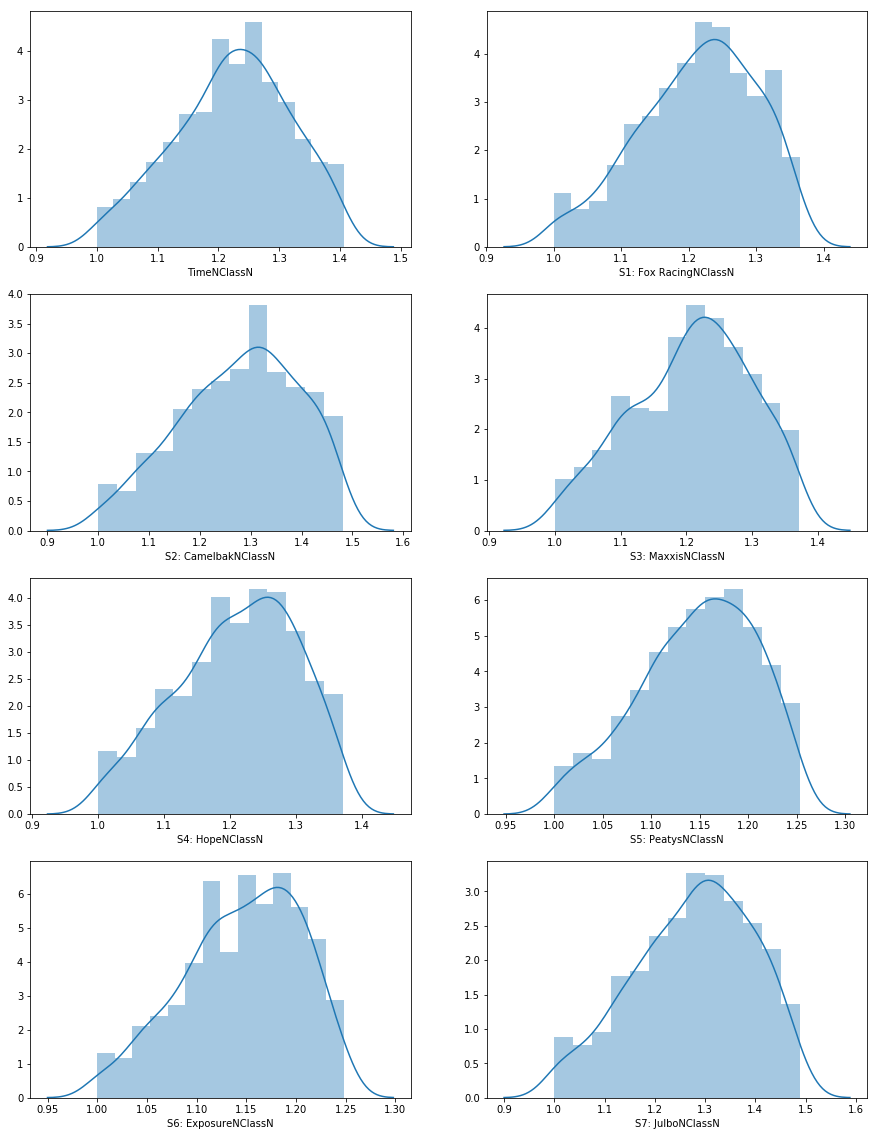

In [12]:
#distributions of the stages in one plot
percentile = 0.75
fig = plt.figure()

for i in [1, 2, 3, 4, 5, 6,7, 8]:
    fig.add_subplot(4,2,i)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i - 1]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)

In [13]:
dfStageNorms = df[normStages[1:]]
df['Median'] = dfStageNorms.median(axis=1)
df['Min'] = dfStageNorms.min(axis=1)
df['StdDev'] = dfStageNorms.std(axis=1)

dfStageClassNorms = df[classNormStages[1:]]
df['MedClassN'] = dfStageClassNorms.median(axis=1)
df['MinClassN'] = dfStageClassNorms.min(axis=1)
df['StdClassN'] = dfStageClassNorms.std(axis=1)

classNormStages

['TimeNClassN',
 'S1: Fox RacingNClassN',
 'S2: CamelbakNClassN',
 'S3: MaxxisNClassN',
 'S4: HopeNClassN',
 'S5: PeatysNClassN',
 'S6: ExposureNClassN',
 'S7: JulboNClassN']

In [14]:
def calculatePositionOnSorted(measure):
    position = pd.Series(np.arange(pd.Series.count(df[measure])) + 1)
    sameMeasure = (df[measure] == df[measure].shift(1))

    j = [1]
    def previousPosIfEqual(i):
        if sameMeasure[i]:
            return j[0]
        else:
            j[0] = position[i]
            return position[i]
    
    pos  = [previousPosIfEqual(i) for i in (np.arange(pd.Series.count(df[measure])))]
    return pos

def addPositions(measure):
    df.sort_values(measure, inplace=True)
    name = 'Pos' + measure
    df[name] = calculatePositionOnSorted(measure)
    return name

positionFields = [addPositions(m) for m in ['TimeN', 'TimeNClassN', 'Median', 'MedClassN',]]
df.sort_values('TimeN', inplace=True)

In [16]:
dataToView = [ 'Name', 'Class', 'Time'] + list(normStages) + classNormStages + ['Median', 'MedClassN', 'Min', 'MinClassN']  + positionFields                                          
dataToView
dfToView = df[dataToView]

#the class winners
dfToView[dfToView['TimeNClassN'] < 1.000001]

,Name,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Pos,,,,,,,,,,,,,,,,,,,,,
1st,Steve Peat,Enduro | Veteran Male,00:19:25.8,1.000000,1.039501,1.000000,1.014749,1.000000,1.007463,1.023239,...,1.000000,1.0,1.007463,1.000000,1.000000,1.0,1,1,1,1
2nd,Danny Hart,Enduro | Senior Male,00:19:29.8,1.003431,1.000000,1.012274,1.000000,1.025788,1.023134,1.026761,...,1.026761,1.0,1.023134,1.006977,1.000000,1.0,2,1,5,10
4th,Ian Austermuhle,Enduro | Master Male,00:19:43.4,1.015097,1.022453,1.015196,1.029499,1.015473,1.049254,1.038732,...,1.000000,1.0,1.029499,1.000000,1.015196,1.0,4,1,6,1
63rd,Fin Clay,Enduro | Hardtail Male,00:21:39.6,1.114771,1.085239,1.132086,1.086726,1.094556,1.112687,1.239437,...,1.143600,1.0,1.112687,1.000000,1.085239,1.0,63,1,57,1
87th,Tracey Moseley,Enduro | Master Female,00:22:06.1,1.137502,1.144283,1.172998,1.139233,1.139828,1.122388,1.159155,...,1.000000,1.0,1.144283,1.000000,1.122388,1.0,87,1,104,1
90th,Timothy Broad,Enduro | Grand Vet Male,00:22:08.3,1.139389,1.153015,1.199883,1.149853,1.139255,1.100000,1.132394,...,1.021601,1.0,1.149853,1.000000,1.100000,1.0,90,1,110,1
237th,Polly Herderson,Enduro | Senior Female,00:23:37.5,1.215903,1.234511,1.265342,1.240708,1.217192,1.211940,1.195070,...,1.032238,1.0,1.234511,1.000000,1.195070,1.0,237,1,301,1
305th,Karen Van Meerbeeck,Enduro | Veteran Female,00:24:02.4,1.237262,1.232848,1.255991,1.218289,1.307736,1.227612,1.250704,...,1.001692,1.0,1.250704,1.000000,1.218289,1.0,305,1,355,1
863rd,Tracey Currie,Enduro | Grand Vet Female,00:32:10.7,1.656116,1.684823,1.853302,1.763422,1.684241,1.445522,1.481690,...,1.000000,1.0,1.684823,1.000000,1.445522,1.0,863,1,934,1


In [17]:
#index by name and select our group
dataNamed = dfToView.set_index('Name')
d = dataNamed.loc[['William Mulholland', 'Rowland Jowett', 'Anthony Hayes', 'Amy Jones', 'Robert Barr', 'Matt Morris', 'John Barwood', 'Rhys Williams']]

#show results ordered by race time
d.sort_values('TimeN')

,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,S7: JulboN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Name,,,,,,,,,,,,,,,,,,,,,
Rowland Jowett,Enduro | Master Male,00:23:18.2,1.199348,1.173389,1.295733,1.246018,1.206877,1.111194,1.165493,1.342954,...,1.122034,1.274778,1.206877,1.188488,1.111194,1.109538,196,229,216,267
John Barwood,Enduro | Master Male,00:23:24.9,1.205095,1.237422,1.301578,1.199410,1.225788,1.158209,1.147183,1.267402,...,1.104407,1.203062,1.225788,1.203062,1.147183,1.104407,208,241,266,324
Rhys Williams,Enduro | Veteran Male,00:23:45.6,1.222851,1.256965,1.299240,1.244248,1.256160,1.160448,1.158451,1.281834,...,1.132140,1.281834,1.256160,1.226163,1.158451,1.132140,261,349,364,395
William Mulholland,Enduro | Master Male,00:24:52.2,1.279979,1.284407,1.344243,1.398230,1.261891,1.186567,1.253521,1.350594,...,1.206780,1.282031,1.284407,1.259788,1.186567,1.184799,425,456,462,510
Matt Morris,Enduro | Veteran Male,00:25:27.6,1.310345,1.307692,1.399766,1.347493,1.315186,1.254478,1.257042,1.434635,...,1.228493,1.434635,1.315186,1.315186,1.254478,1.228493,509,577,550,671
Amy Jones,Enduro | Master Female,00:26:39.8,1.372277,1.416216,1.420222,1.528614,1.357020,1.250000,1.290845,1.438879,...,1.113609,1.182833,1.416216,1.190548,1.250000,1.113609,625,288,750,271
Robert Barr,Enduro | Veteran Male,00:40:21.3,2.076943,1.205821,1.269433,6.892035,1.206304,1.114925,1.640845,1.297114,...,1.603579,1.297114,1.269433,1.269433,1.114925,1.106667,930,934,394,539
Anthony Hayes,Enduro | Veteran Male,01:21:29.3,4.193944,1.389189,1.753945,1.595870,17.426934,1.334328,1.333099,4.887097,...,1.302822,4.887097,1.595870,1.572674,1.333099,1.302822,967,967,900,918


In [18]:
# results ordered by race time/class winner race time
d.sort_values('TimeNClassN')

,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,S7: JulboN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Name,,,,,,,,,,,,,,,,,,,,,
Rowland Jowett,Enduro | Master Male,00:23:18.2,1.199348,1.173389,1.295733,1.246018,1.206877,1.111194,1.165493,1.342954,...,1.122034,1.274778,1.206877,1.188488,1.111194,1.109538,196,229,216,267
John Barwood,Enduro | Master Male,00:23:24.9,1.205095,1.237422,1.301578,1.199410,1.225788,1.158209,1.147183,1.267402,...,1.104407,1.203062,1.225788,1.203062,1.147183,1.104407,208,241,266,324
Amy Jones,Enduro | Master Female,00:26:39.8,1.372277,1.416216,1.420222,1.528614,1.357020,1.250000,1.290845,1.438879,...,1.113609,1.182833,1.416216,1.190548,1.250000,1.113609,625,288,750,271
Rhys Williams,Enduro | Veteran Male,00:23:45.6,1.222851,1.256965,1.299240,1.244248,1.256160,1.160448,1.158451,1.281834,...,1.132140,1.281834,1.256160,1.226163,1.158451,1.132140,261,349,364,395
William Mulholland,Enduro | Master Male,00:24:52.2,1.279979,1.284407,1.344243,1.398230,1.261891,1.186567,1.253521,1.350594,...,1.206780,1.282031,1.284407,1.259788,1.186567,1.184799,425,456,462,510
Matt Morris,Enduro | Veteran Male,00:25:27.6,1.310345,1.307692,1.399766,1.347493,1.315186,1.254478,1.257042,1.434635,...,1.228493,1.434635,1.315186,1.315186,1.254478,1.228493,509,577,550,671
Robert Barr,Enduro | Veteran Male,00:40:21.3,2.076943,1.205821,1.269433,6.892035,1.206304,1.114925,1.640845,1.297114,...,1.603579,1.297114,1.269433,1.269433,1.114925,1.106667,930,934,394,539
Anthony Hayes,Enduro | Veteran Male,01:21:29.3,4.193944,1.389189,1.753945,1.595870,17.426934,1.334328,1.333099,4.887097,...,1.302822,4.887097,1.595870,1.572674,1.333099,1.302822,967,967,900,918


In [19]:
#results ordered by min stage time/stage winners time on any stage

#what the hell did Rob do on Peaty's?
#almost everyone was fastest on Peaty's.
d.sort_values('Min')

,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,S7: JulboN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Name,,,,,,,,,,,,,,,,,,,,,
Rowland Jowett,Enduro | Master Male,00:23:18.2,1.199348,1.173389,1.295733,1.246018,1.206877,1.111194,1.165493,1.342954,...,1.122034,1.274778,1.206877,1.188488,1.111194,1.109538,196,229,216,267
Robert Barr,Enduro | Veteran Male,00:40:21.3,2.076943,1.205821,1.269433,6.892035,1.206304,1.114925,1.640845,1.297114,...,1.603579,1.297114,1.269433,1.269433,1.114925,1.106667,930,934,394,539
John Barwood,Enduro | Master Male,00:23:24.9,1.205095,1.237422,1.301578,1.199410,1.225788,1.158209,1.147183,1.267402,...,1.104407,1.203062,1.225788,1.203062,1.147183,1.104407,208,241,266,324
Rhys Williams,Enduro | Veteran Male,00:23:45.6,1.222851,1.256965,1.299240,1.244248,1.256160,1.160448,1.158451,1.281834,...,1.132140,1.281834,1.256160,1.226163,1.158451,1.132140,261,349,364,395
William Mulholland,Enduro | Master Male,00:24:52.2,1.279979,1.284407,1.344243,1.398230,1.261891,1.186567,1.253521,1.350594,...,1.206780,1.282031,1.284407,1.259788,1.186567,1.184799,425,456,462,510
Amy Jones,Enduro | Master Female,00:26:39.8,1.372277,1.416216,1.420222,1.528614,1.357020,1.250000,1.290845,1.438879,...,1.113609,1.182833,1.416216,1.190548,1.250000,1.113609,625,288,750,271
Matt Morris,Enduro | Veteran Male,00:25:27.6,1.310345,1.307692,1.399766,1.347493,1.315186,1.254478,1.257042,1.434635,...,1.228493,1.434635,1.315186,1.315186,1.254478,1.228493,509,577,550,671
Anthony Hayes,Enduro | Veteran Male,01:21:29.3,4.193944,1.389189,1.753945,1.595870,17.426934,1.334328,1.333099,4.887097,...,1.302822,4.887097,1.595870,1.572674,1.333099,1.302822,967,967,900,918


In [20]:
# as above but by class stage winners time
d.sort_values('MinClassN')

,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,S7: JulboN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Name,,,,,,,,,,,,,,,,,,,,,
John Barwood,Enduro | Master Male,00:23:24.9,1.205095,1.237422,1.301578,1.199410,1.225788,1.158209,1.147183,1.267402,...,1.104407,1.203062,1.225788,1.203062,1.147183,1.104407,208,241,266,324
Robert Barr,Enduro | Veteran Male,00:40:21.3,2.076943,1.205821,1.269433,6.892035,1.206304,1.114925,1.640845,1.297114,...,1.603579,1.297114,1.269433,1.269433,1.114925,1.106667,930,934,394,539
Rowland Jowett,Enduro | Master Male,00:23:18.2,1.199348,1.173389,1.295733,1.246018,1.206877,1.111194,1.165493,1.342954,...,1.122034,1.274778,1.206877,1.188488,1.111194,1.109538,196,229,216,267
Amy Jones,Enduro | Master Female,00:26:39.8,1.372277,1.416216,1.420222,1.528614,1.357020,1.250000,1.290845,1.438879,...,1.113609,1.182833,1.416216,1.190548,1.250000,1.113609,625,288,750,271
Rhys Williams,Enduro | Veteran Male,00:23:45.6,1.222851,1.256965,1.299240,1.244248,1.256160,1.160448,1.158451,1.281834,...,1.132140,1.281834,1.256160,1.226163,1.158451,1.132140,261,349,364,395
William Mulholland,Enduro | Master Male,00:24:52.2,1.279979,1.284407,1.344243,1.398230,1.261891,1.186567,1.253521,1.350594,...,1.206780,1.282031,1.284407,1.259788,1.186567,1.184799,425,456,462,510
Matt Morris,Enduro | Veteran Male,00:25:27.6,1.310345,1.307692,1.399766,1.347493,1.315186,1.254478,1.257042,1.434635,...,1.228493,1.434635,1.315186,1.315186,1.254478,1.228493,509,577,550,671
Anthony Hayes,Enduro | Veteran Male,01:21:29.3,4.193944,1.389189,1.753945,1.595870,17.426934,1.334328,1.333099,4.887097,...,1.302822,4.887097,1.595870,1.572674,1.333099,1.302822,967,967,900,918


In [21]:
# the results sorted by median (stage time/stage winners time)
d.sort_values('Median')

,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,S7: JulboN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Name,,,,,,,,,,,,,,,,,,,,,
Rowland Jowett,Enduro | Master Male,00:23:18.2,1.199348,1.173389,1.295733,1.246018,1.206877,1.111194,1.165493,1.342954,...,1.122034,1.274778,1.206877,1.188488,1.111194,1.109538,196,229,216,267
John Barwood,Enduro | Master Male,00:23:24.9,1.205095,1.237422,1.301578,1.199410,1.225788,1.158209,1.147183,1.267402,...,1.104407,1.203062,1.225788,1.203062,1.147183,1.104407,208,241,266,324
Rhys Williams,Enduro | Veteran Male,00:23:45.6,1.222851,1.256965,1.299240,1.244248,1.256160,1.160448,1.158451,1.281834,...,1.132140,1.281834,1.256160,1.226163,1.158451,1.132140,261,349,364,395
Robert Barr,Enduro | Veteran Male,00:40:21.3,2.076943,1.205821,1.269433,6.892035,1.206304,1.114925,1.640845,1.297114,...,1.603579,1.297114,1.269433,1.269433,1.114925,1.106667,930,934,394,539
William Mulholland,Enduro | Master Male,00:24:52.2,1.279979,1.284407,1.344243,1.398230,1.261891,1.186567,1.253521,1.350594,...,1.206780,1.282031,1.284407,1.259788,1.186567,1.184799,425,456,462,510
Matt Morris,Enduro | Veteran Male,00:25:27.6,1.310345,1.307692,1.399766,1.347493,1.315186,1.254478,1.257042,1.434635,...,1.228493,1.434635,1.315186,1.315186,1.254478,1.228493,509,577,550,671
Amy Jones,Enduro | Master Female,00:26:39.8,1.372277,1.416216,1.420222,1.528614,1.357020,1.250000,1.290845,1.438879,...,1.113609,1.182833,1.416216,1.190548,1.250000,1.113609,625,288,750,271
Anthony Hayes,Enduro | Veteran Male,01:21:29.3,4.193944,1.389189,1.753945,1.595870,17.426934,1.334328,1.333099,4.887097,...,1.302822,4.887097,1.595870,1.572674,1.333099,1.302822,967,967,900,918


In [22]:
# as above but with median of (stage time/class stage winners time)
# I think this is the best measure of performance - though bizzarrely Rob drops behind me because Vet has the winner...
dz = d.sort_values('MedClassN') #['Class', 'Time', 'TimeNorm', 'TimeNormClassNorm', 'Median', 'MedianClassNorm' , 'Min' , 'MinClassNorm']

In [23]:
dz

,Class,Time,TimeN,S1: Fox RacingN,S2: CamelbakN,S3: MaxxisN,S4: HopeN,S5: PeatysN,S6: ExposureN,S7: JulboN,...,S6: ExposureNClassN,S7: JulboNClassN,Median,MedClassN,Min,MinClassN,PosTimeN,PosTimeNClassN,PosMedian,PosMedClassN
Name,,,,,,,,,,,,,,,,,,,,,
Rowland Jowett,Enduro | Master Male,00:23:18.2,1.199348,1.173389,1.295733,1.246018,1.206877,1.111194,1.165493,1.342954,...,1.122034,1.274778,1.206877,1.188488,1.111194,1.109538,196,229,216,267
Amy Jones,Enduro | Master Female,00:26:39.8,1.372277,1.416216,1.420222,1.528614,1.357020,1.250000,1.290845,1.438879,...,1.113609,1.182833,1.416216,1.190548,1.250000,1.113609,625,288,750,271
John Barwood,Enduro | Master Male,00:23:24.9,1.205095,1.237422,1.301578,1.199410,1.225788,1.158209,1.147183,1.267402,...,1.104407,1.203062,1.225788,1.203062,1.147183,1.104407,208,241,266,324
Rhys Williams,Enduro | Veteran Male,00:23:45.6,1.222851,1.256965,1.299240,1.244248,1.256160,1.160448,1.158451,1.281834,...,1.132140,1.281834,1.256160,1.226163,1.158451,1.132140,261,349,364,395
William Mulholland,Enduro | Master Male,00:24:52.2,1.279979,1.284407,1.344243,1.398230,1.261891,1.186567,1.253521,1.350594,...,1.206780,1.282031,1.284407,1.259788,1.186567,1.184799,425,456,462,510
Robert Barr,Enduro | Veteran Male,00:40:21.3,2.076943,1.205821,1.269433,6.892035,1.206304,1.114925,1.640845,1.297114,...,1.603579,1.297114,1.269433,1.269433,1.114925,1.106667,930,934,394,539
Matt Morris,Enduro | Veteran Male,00:25:27.6,1.310345,1.307692,1.399766,1.347493,1.315186,1.254478,1.257042,1.434635,...,1.228493,1.434635,1.315186,1.315186,1.254478,1.228493,509,577,550,671
Anthony Hayes,Enduro | Veteran Male,01:21:29.3,4.193944,1.389189,1.753945,1.595870,17.426934,1.334328,1.333099,4.887097,...,1.302822,4.887097,1.595870,1.572674,1.333099,1.302822,967,967,900,918
